# ***Wine Quality Prediction: Machine Learning Model Comparison & Optimization🍷***
This project explores the prediction of wine quality using machine learning techniques. We compare three classification models—Logistic Regression, Random Forest, and Support Vector Machine—to determine the most accurate predictor. The study includes data preprocessing, exploratory data analysis, model training, hyperparameter tuning, and feature importance analysis. By optimizing each model, we assess improvements in accuracy and identify key wine characteristics that influence quality. Finally, we deploy the best-performing model for real-world predictions.


***Importing Required Libraries:***

In [4]:
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For better-looking visualizations

from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.svm import SVC  # Support Vector Machine model
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation

***Loading the Dataset:***

In [5]:
# Load dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=';')

In [6]:
# Display the first 5 rows
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Display dataset info (column names, data types, missing values)
print(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [8]:
# Check for missing values
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


***Exploratory Data Analysis (EDA):***

In [9]:
#Check Dataset Shape
print(f"Dataset contains {wine_data.shape[0]} rows and {wine_data.shape[1]} columns.")

Dataset contains 1599 rows and 12 columns.


In [10]:
#Check Summary Statistics
print(wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<Figure size 1200x600 with 0 Axes>

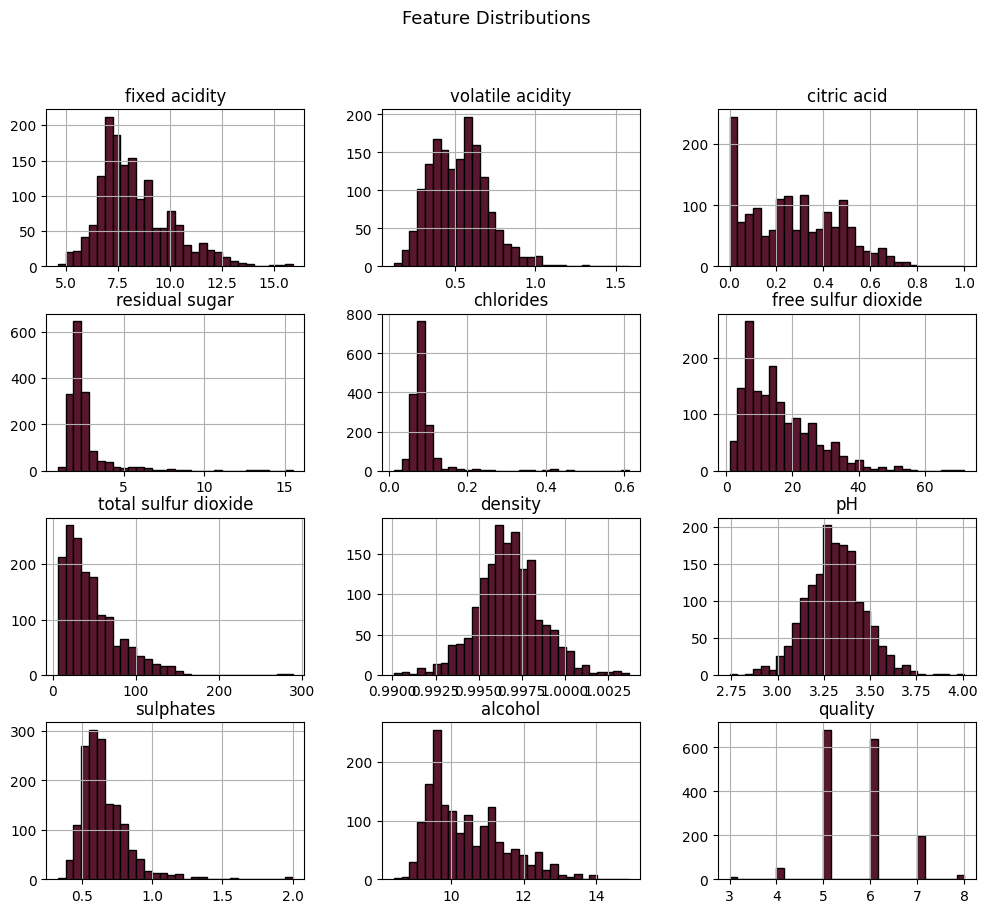

In [11]:
#Visualizing Feature Distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot histograms for each feature
wine_data.hist(bins=30, figsize=(12, 10), color='#58172e', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=13)
plt.show()


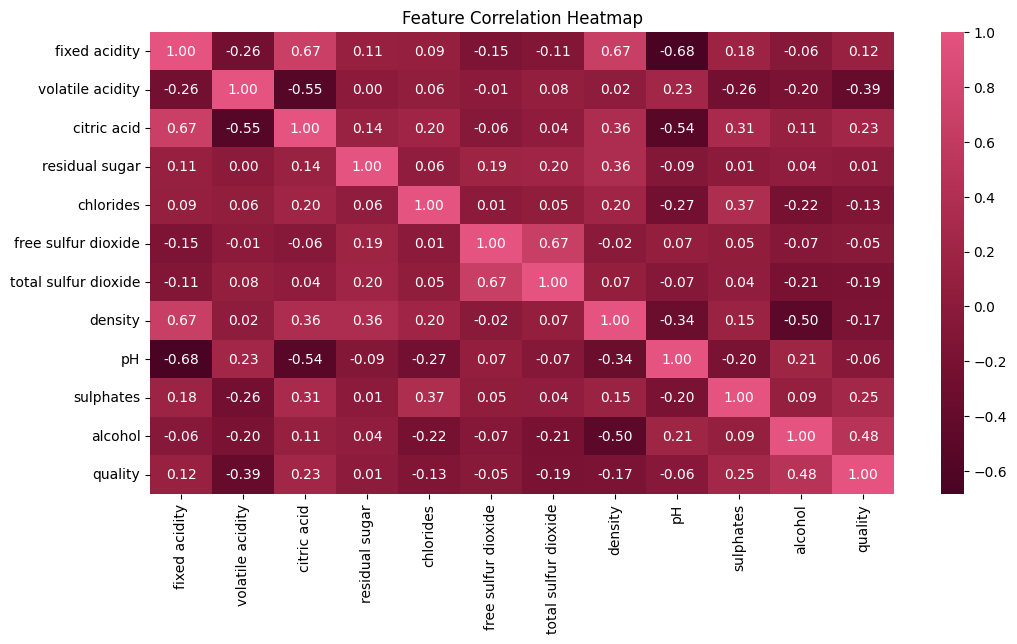

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define custom wine color colormap
wine_colors = ["#4A0323", "#730F30", "#9B2242", "#C0395E", "#E55381"]
custom_cmap = LinearSegmentedColormap.from_list("WineCmap", wine_colors)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(wine_data.corr(), annot=True, cmap=custom_cmap, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

***Data Preprocessing:***

In [13]:
# Convert wine quality into binary classification
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Check the class distribution
print(wine_data['quality'].value_counts())


quality
1    855
0    744
Name: count, dtype: int64


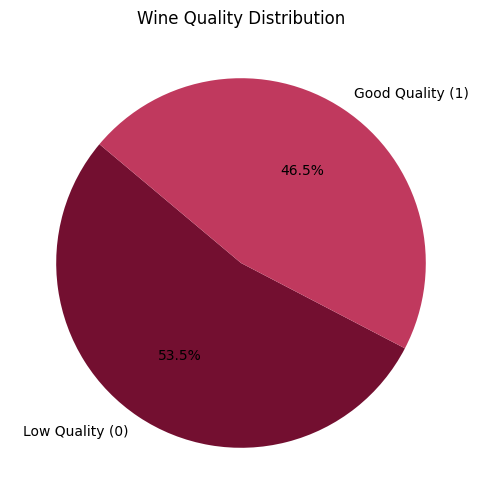

In [14]:
import matplotlib.pyplot as plt

# Example distribution (adjust based on dataset)
quality_counts = wine_data['quality'].value_counts()
labels = ['Low Quality (0)', 'Good Quality (1)']
colors = ['#730F30', '#C0395E']  # Grape wine color theme

plt.figure(figsize=(6, 6))
plt.pie(quality_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Wine Quality Distribution")
plt.show()

In [15]:
#Split Features and Target Variable
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target variable

In [16]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1279 samples
Testing set size: 320 samples


In [17]:
#Scale the Features (Standardization), Feature scaling helps models like Logistic Regression and SVM perform better & Feature scaling is not required for Random Forest because it is a tree-based model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***Model Training & Evaluation:***

In [18]:
#Train Logistic Regression, Random Forest, and SVM
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC()
}

In [19]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy (Before Tuning): {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


Logistic Regression Accuracy (Before Tuning): 0.7406
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Confusion Matrix:
 [[105  36]
 [ 47 132]]
--------------------------------------------------

Random Forest Accuracy (Before Tuning): 0.7844
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       141
           1       0.81      0.81      0.81       179

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

Confusion Matrix:
 [[106  35]
 [ 34 145]]
--------------------------------------------------

Support V

In [20]:
#Hyperparameter Tuning for Logistic Regression
# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']  # Different solvers
}

In [21]:
# Initialize model
log_reg = LogisticRegression(max_iter=500)

In [22]:
# Use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [23]:
# Best parameters and model
best_log_reg = grid_search.best_estimator_
print("Best Parameters for Logistic Regression:", grid_search.best_params_)

Best Parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}


In [24]:
# Make predictions with the optimized model
y_pred_log = best_log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Optimized Logistic Regression Accuracy: {accuracy_log:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Optimized Logistic Regression Accuracy: 0.7406
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Confusion Matrix:
 [[105  36]
 [ 47 132]]


In [25]:
#Feature Importance Analysis
# Get feature importance from the trained Random Forest model
rf_model = models["Random Forest"]  # Access trained RF model
feature_importances = rf_model.feature_importances_
features = X.columns  # Get feature names

In [26]:
# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

<ipython-input-27-3a56fe3c9f73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices], y=features[sorted_indices], palette="magma")


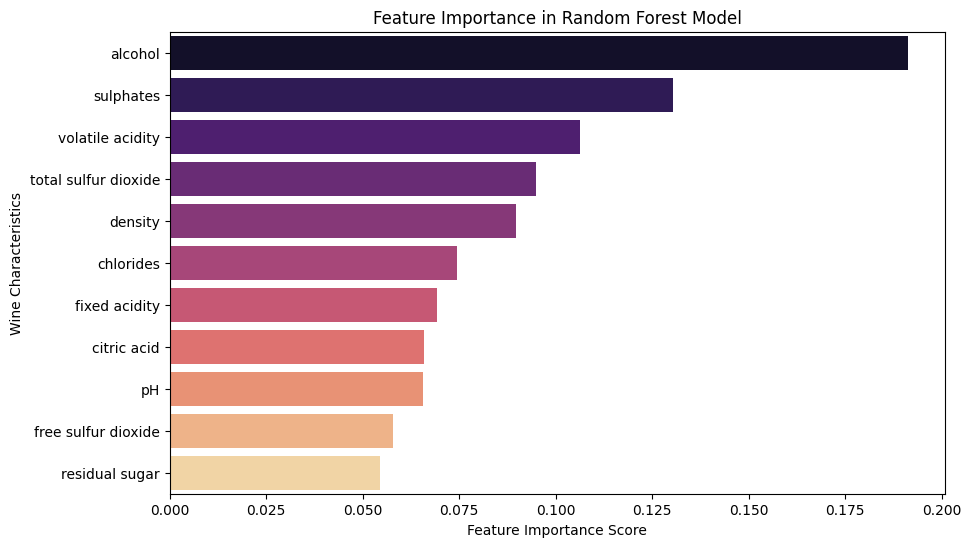

In [27]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=features[sorted_indices], palette="magma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Wine Characteristics")
plt.title("Feature Importance in Random Forest Model")
plt.show()

# ***What Features are Most Important for Wine Quality?***
### **📌 Top Features Impacting Wine Quality:**


1.  Alcohol (higher alcohol content generally means better quality)
2. Volatile Acidity (high levels negatively impact quality)
3. Sulfur Dioxide levels (affects preservation and taste)
4. Density & pH (affect the balance of the wine)

In [28]:
#Hyperparameter Tuning Parameter for Random Forest
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

In [29]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

In [30]:
# Perform Grid Search
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [31]:
# Print the best parameters
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [32]:
# Train the optimized Random Forest model
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

In [33]:
# Evaluate performance of the optimized Random Forest model
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("-" * 50)

Optimized Random Forest Accuracy: 0.790625

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       141
           1       0.81      0.82      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320


Confusion Matrix:
 [[107  34]
 [ 33 146]]
--------------------------------------------------


In [34]:
#Hyperparameter Tuning for SVM
# Define parameter grid
svm_param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

In [35]:
# Initialize SVM
svm = SVC()

In [36]:
# Perform Grid Search
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [37]:
# Print the best parameters
print("Best parameters for SVM:", svm_grid_search.best_params_)

Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [38]:
# Train the optimized SVM model
best_svm = svm_grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)

In [39]:
# Evaluate performance of the optimized SVM model
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("-" * 50)

Optimized SVM Accuracy: 0.7625

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       141
           1       0.80      0.77      0.78       179

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320


Confusion Matrix:
 [[107  34]
 [ 42 137]]
--------------------------------------------------


***Final Model Comparison: Default vs. Optimized Accuracy:***

In [40]:
# Model names
models = ["Logistic Regression", "Random Forest", "SVM"]

In [41]:
# Default accuracies
default_accuracies = [0.7406, 0.7844, 0.7719]

# Optimized accuracies
optimized_accuracies = [0.7406, 0.7906, 0.7625]

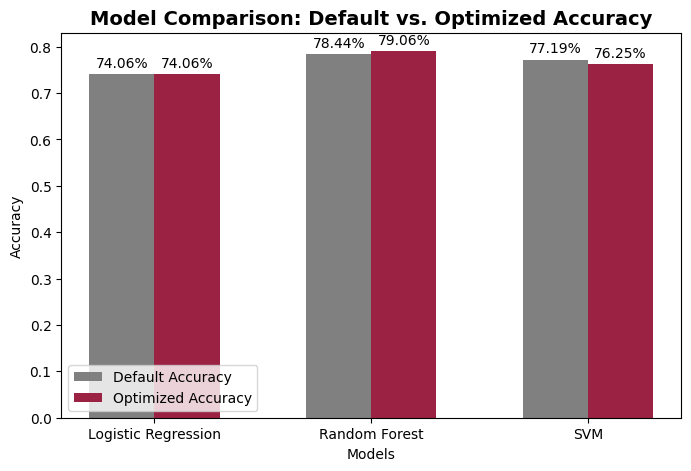

In [42]:
# Set up bar chart
x = np.arange(len(models))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, default_accuracies, width, label='Default Accuracy', color='gray')
bars2 = ax.bar(x + width/2, optimized_accuracies, width, label='Optimized Accuracy', color='#9B2242')

# Labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Model Comparison: Default vs. Optimized Accuracy", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points", ha='center', fontsize=10, color='black')

plt.show()

***Save the Best Model:***

*Since Random Forest (Optimized) performed the best with 79.06% accuracy, we will save it using joblib or pickle.*

In [43]:
import joblib

# Save the best model (Optimized Random Forest)
best_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)  # Use best hyperparameters
best_model.fit(X_train, y_train)  # Train the final model

# Save the trained model to a file
joblib.dump(best_model, 'best_wine_quality_model.pkl')

print("Best model saved successfully as 'best_wine_quality_model.pkl'")


Best model saved successfully as 'best_wine_quality_model.pkl'


***Code to Load and Use the Model Later:***

In [44]:
# Load the saved model
loaded_model = joblib.load('best_wine_quality_model.pkl')

# Make predictions on new data (example)
# Ensure X_test is in DataFrame format
sample_data = pd.DataFrame(X_test).iloc[:5]  # Taking first 5 test samples

# Predict wine quality
predictions = loaded_model.predict(sample_data)

# Convert predictions to readable format
predicted_labels = ["Low Quality Wine" if pred == 0 else "Good Quality Wine" for pred in predictions]

# Print results
print("\nFinal Predictions:")
for i, label in enumerate(predicted_labels):
    print(f"Sample {i+1}: {label}")

# Print raw prediction values for reference
print("\nRaw Predicted Quality Labels:", predictions)
print("\n(Note: 0 = Low Quality Wine, 1 = Good Quality Wine)")



Final Predictions:
Sample 1: Low Quality Wine
Sample 2: Low Quality Wine
Sample 3: Low Quality Wine
Sample 4: Low Quality Wine
Sample 5: Good Quality Wine

Raw Predicted Quality Labels: [0 0 0 0 1]

(Note: 0 = Low Quality Wine, 1 = Good Quality Wine)


# ***Final Thoughts***
✅ Random Forest is the best model for predicting wine quality.

✅ Hyperparameter tuning slightly improved performance, especially for Random Forest.

✅ The most important factors affecting wine quality are alcohol content, volatile acidity, and sulfur dioxide levels.

✅ This project showcases data preprocessing, model training, tuning, evaluation, and interpretation—**a complete ML workflow!**